# 1번

In [45]:
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.formula.api import logit
from pandas import DataFrame
from pandas import merge
import pandas as pd

In [3]:
df = read_excel('http://itpaper.co.kr/data/flight_delays.xlsx', engine='openpyxl')

df

,FL_NUM,TAIL_NUM,FL_DATE,DAY_WEEK,CRS_DEP_TIME,DEP_TIME,ORIGIN,DEST,CARRIER,DISTANCE,WEATHER,FLIGHT_STATUS
0,5935,N940CA,2004/01/01,4,1455,1455,BWI,JFK,OH,184,0,ontime
1,6155,N405FJ,2004/01/01,4,1640,1640,DCA,JFK,DH,213,0,ontime
2,7208,N695BR,2004/01/01,4,1245,1245,IAD,LGA,DH,229,0,ontime
3,7215,N662BR,2004/01/01,4,1715,1709,IAD,LGA,DH,229,0,ontime
4,7792,N698BR,2004/01/01,4,1039,1035,IAD,LGA,DH,229,0,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2761,N15555,2004/1/31,6,645,644,DCA,EWR,RU,199,0,ontime
2197,2497,N16976,2004/1/31,6,1700,1653,IAD,EWR,RU,213,0,ontime
2198,2361,N14902,2004/1/31,6,1600,1558,DCA,EWR,RU,199,0,ontime
2199,2216,N16961,2004/1/31,6,1359,1403,DCA,EWR,RU,199,0,ontime


In [5]:
delay_count = df['FLIGHT_STATUS'].value_counts().sort_index()
delay_count

delayed     428
ontime     1773
Name: FLIGHT_STATUS, dtype: int64

In [10]:
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"]=12
plt.rcParams['axes.unicode_minus']=False

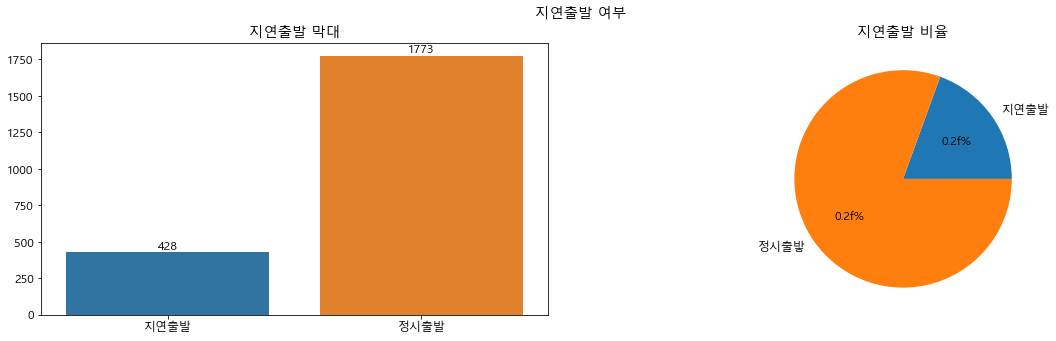

In [17]:
fig,ax = plt.subplots(1,2,figsize = (20,5))

fig.suptitle('지연출발 여부')
sns.barplot(x = delay_count.index, y = delay_count.values, ax = ax[0])

ax[0].set_title('지연출발 막대')
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['지연출발', '정시출발'])

for i,v in enumerate(delay_count.values):
    ax[0].text(x=i,y=v,s="%s"% v,fontsize=12,verticalalignment='bottom',horizontalalignment='center')
    
ax[1].pie(delay_count.values, labels=['지연출발', '정시출밯'], autopct='0.2f%%')
ax[1].set_title('지연출발 비율')
plt.show()
plt.close()


# 2번

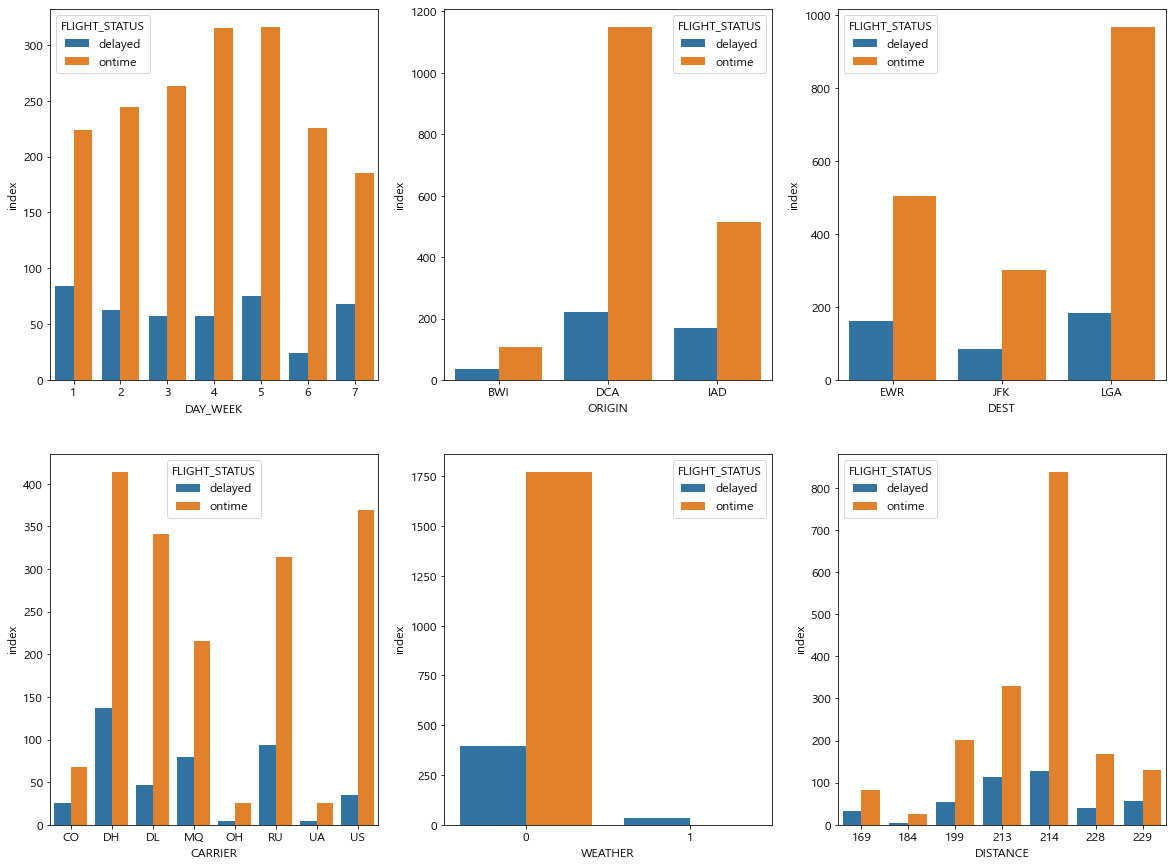

In [30]:
columns = ['DAY_WEEK','ORIGIN','DEST','CARRIER','WEATHER','DISTANCE']

fig,ax = plt.subplots(2,3,figsize = (20,15))

ax = ax.ravel()

for i,v in enumerate(columns):
    tmp = df.filter([v,'FLIGHT_STATUS']).reset_index().groupby([v,'FLIGHT_STATUS'],
                    as_index=False).count().sort_values([v,'FLIGHT_STATUS'])
    sns.barplot(data=tmp,x=v,y='index',hue='FLIGHT_STATUS',ax=ax[i])
    
plt.show()
plt.close()

# 3번

In [33]:
df['DAY_WEEK']=df['DAY_WEEK'].astype('category')
df['ORIGIN']=df['ORIGIN'].astype('category').cat.rename_categories({'BWI':1,'DCA':2,'IAD':3})
df['DEST']=df['DEST'].astype('category').cat.rename_categories({'JFK':1,'LGA':2,'EWR':3})
df['CARRIER']=df['CARRIER'].astype('category').cat.rename_categories({'OH':1,'DH':2,'DL':3,'MQ':4,'UA':5,'US':6,'RU':
7,'CO':8})
df['FLIGHT_STATUS']=df['FLIGHT_STATUS'].astype('category').cat.rename_categories({'ontime':1,'delayed':0})
df['FLIGHT_STATUS']=df['FLIGHT_STATUS'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FL_NUM         2201 non-null   int64   
 1   TAIL_NUM       2201 non-null   object  
 2   FL_DATE        2201 non-null   object  
 3   DAY_WEEK       2201 non-null   category
 4   CRS_DEP_TIME   2201 non-null   int64   
 5   DEP_TIME       2201 non-null   int64   
 6   ORIGIN         2201 non-null   category
 7   DEST           2201 non-null   category
 8   CARRIER        2201 non-null   category
 9   DISTANCE       2201 non-null   int64   
 10  WEATHER        2201 non-null   int64   
 11  FLIGHT_STATUS  2201 non-null   int64   
dtypes: category(4), int64(6), object(2)
memory usage: 147.2+ KB


# 4번

In [37]:
model = logit('FLIGHT_STATUS ~ DAY_WEEK+ORIGIN+DEST+CARRIER+DISTANCE+WEATHER', data = df)
fit = model.fit()
pred = fit.predict(df)
pred

         Current function value: 0.442548
         Iterations: 35


c:\users\junhong\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0       0.891912
1       0.846023
2       0.787785
3       0.787785
4       0.787785
          ...   
2196    0.913517
2197    0.869984
2198    0.913517
2199    0.913517
2200    0.913517
Length: 2201, dtype: float64

In [50]:
pdf = DataFrame(pred, columns = ['추정확률'])
pdf['예상결과'] = np.where(pdf['추정확률'] > 0.5, '정상운행', '지연됨')
pdf['실제결과'] = np.where(df['FLIGHT_STATUS'] == 1, "정상운행", "지연됨")
pdf.drop('추정확률', axis = 1, inplace = True)
pdf

,예상결과,실제결과
0,정상운행,정상운행
1,정상운행,정상운행
2,정상운행,정상운행
3,정상운행,정상운행
4,정상운행,정상운행
...,...,...
2196,정상운행,정상운행
2197,정상운행,정상운행
2198,정상운행,정상운행
2199,정상운행,정상운행


In [51]:
tmp1 = pdf.groupby('예상결과').count().rename(columns={'실제결과':'예상결과'})
tmp2 = pdf.groupby('실제결과').count().rename(columns={'예상결과':'실제결과'})
result_df = merge(tmp1, tmp2, left_index = True, right_index = True)
result_df

,예상결과,실제결과
예상결과,,
정상운행,2169,1773
지연됨,32,428


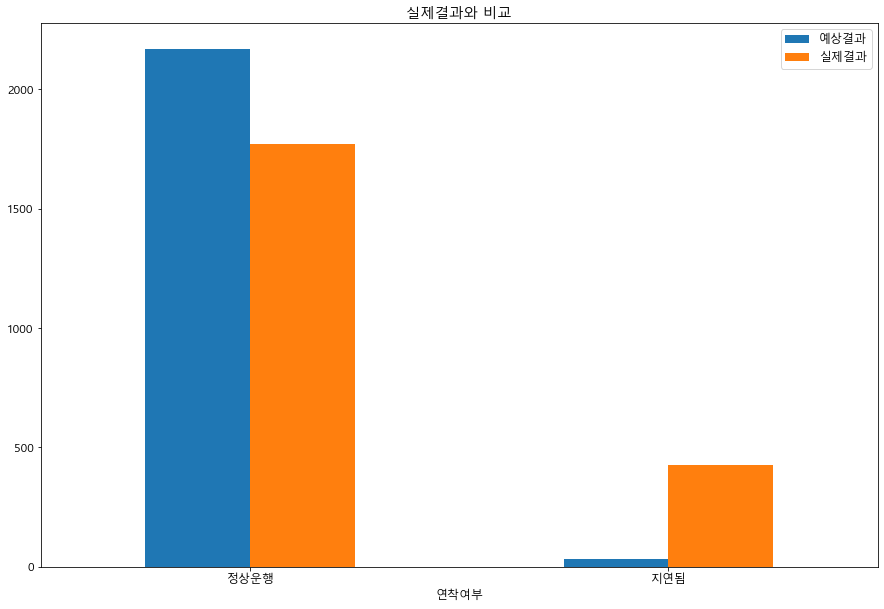

In [55]:
fig, ax = plt.subplots(1,1, figsize = ( 15, 10))
result_df.plot.bar(ax = ax, rot = 0)
ax.set_title('실제결과와 비교')
ax.set_xlabel('연착여부')

plt.show()
plt.close()